![](https://cdn.hashnode.com/res/hashnode/image/upload/v1761770659306/3d774ede-f5b6-44d3-9b3e-a8120fd62eb7.jpeg?w=1600&h=840&fit=crop&crop=entropy&auto=compress,format&format=webp)

# Task

### Solve Notebook-1 Tasks Below

#### Note: The code for the tasks below will not run on its own. It assumes all the initial setup code from the notebook (loading London_2014.csv, cleaning columns, changing types, etc.) has already been executed. The following cells provide the solutions to the specific tasks as requested.

---

 ```1``` Now that the wind direction is given by a number, write code to select all days that had a northerly wind. Hint: select the rows where the direction is greater than or equal to 350 or smaller than or equal to 10, as the compass rose shows.

```python
northerly_wind_days = london[(london['WindDirDegrees'] >= 350) | (london['WindDirDegrees'] <= 10)]

# Display the results
print("--- Days with Northerly Wind ---")
print(northerly_wind_days)
```

---

```2``` In the code cell below, write code to get and display all the rows in the dataframe that are beween 1 April 2014 and 11 April 2014.

```python

# Define the start and end dates
start_date = datetime(2014, 4, 1)
end_date = datetime(2014, 4, 11)

# Select the rows where the 'GMT' column is between the start and end dates
april_days = london[(london['GMT'] >= start_date) & (london['GMT'] <= end_date)]

# Display the results
print("--- Days between April 1 and April 11, 2014 ---")
print(april_days)
```

---

```3``` In the cell below, write two lines of code to display the first five rows that have a missing value in the 'Max Gust SpeedKm/h' column. Hint: first select the missing value rows and store them in a new dataframe, then display the first five rows of the new dataframe.

```python

missing_gust_speed = london[london['Max Gust SpeedKm/h'].isnull()]

# 2. Display the first five rows of this new dataframe.
print("--- First 5 rows with missing 'Max Gust SpeedKm/h' ---")
print(missing_gust_speed.head())

```

---

### Solve Notebook-2 Tasks Below

```1``` in the cell below, write code to plot the minimum, mean, and maximum temperature during 2014 in London.

```python

# Make sure plots appear in the notebook
%matplotlib inline

# Task: Plot the minimum, mean, and maximum temperature during 2014
london[['Min TemperatureC', 'Mean TemperatureC', 'Max TemperatureC']].plot(grid=True, figsize=(10,5))

```

---
```2``` Use the code cell below to plot the values of 'Mean Humidity' during spring (full months of March, April and May).


```python
# Make sure plots appear in the notebook
%matplotlib inline

if not isinstance(london.index, pd.DatetimeIndex):
    london.index = london['GMT']

# --- Task: Plot 'Mean Humidity' during spring (March, April and May) ---

# 1. Define the start and end of spring
spring_start = datetime(2014, 3, 1)
spring_end = datetime(2014, 5, 31)

# 2. Select the rows for the spring months using .loc
spring_data = london.loc[spring_start : spring_end]

# 3. Plot the 'Mean Humidity' column from your new spring dataframe
print("--- Plot of Mean Humidity (Spring 2014) ---")
spring_data['Mean Humidity'].plot(grid=True, figsize=(10,5))

```

# Project :  Holiday weather


There is nothing I like better than taking a holiday. In this project I am going to use the historic weather data from the Weather Underground for London to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2025 may be very different to 2020 but it should give some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2023 to: 31 December 2023 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.


Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

## Step-1 Cleaning the data


In [1]:
import pandas as pd
from datetime import datetime
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Make plots appear in the notebook
%matplotlib inline

# Load your dataset
file_path = '/kaggle/input/heathrow-airport-meteostat/export.csv'
df = pd.read_csv(file_path)

# Inspect the data (just like in the notebook)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    4 non-null      float64
 6   wdir    0 non-null      float64
 7   wspd    365 non-null    float64
 8   wpgt    365 non-null    int64  
 9   pres    365 non-null    float64
 10  tsun    365 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 31.5+ KB


In [2]:
# --- 2. Data Cleaning ---

# Convert 'date' column from text (object) to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Drop empty columns (drop 'wdir' (100% empty) and 'snow' (99% empty) )
df = df.drop(columns=['wdir', 'snow'])

# Set the 'date' column as the index ---
df.index = df['date']

# drop the original 'date' column
df = df.drop(columns=['date'])

# --- Verification ---
print("--- Cleaned and Indexed Data ---")
df.info()

--- Cleaned and Indexed Data ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    365 non-null    float64
 1   tmin    365 non-null    float64
 2   tmax    365 non-null    float64
 3   prcp    365 non-null    float64
 4   wspd    365 non-null    float64
 5   wpgt    365 non-null    int64  
 6   pres    365 non-null    float64
 7   tsun    365 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 25.7 KB


---

## Step-2 Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So create a dataframe that holds just those months using the `datetime` index.

In [3]:
# Create the summer dataframe
start_summer = datetime(2023, 6, 1)
end_summer = datetime(2023, 8, 31)

summer_df = df.loc[start_summer : end_summer].copy()

# --- Verification ---
print(f"--- Summer Dataframe Created: {len(summer_df)} days ---")
print(summer_df.head())

--- Summer Dataframe Created: 92 days ---
            tavg  tmin  tmax  prcp  wspd  wpgt    pres  tsun
date                                                        
2023-06-01  13.0   9.9  19.8   0.0  15.8    41  1025.5   439
2023-06-02  13.8  10.5  19.4   0.0  16.7    37  1024.5   473
2023-06-03  15.2   7.4  22.8   0.0  14.0    35  1023.4   538
2023-06-04  16.1   9.1  22.6   0.0  13.2    35  1023.8   781
2023-06-05  13.4   9.5  21.4   0.0  14.8    32  1024.5   513


--- Analysis Plots ---


<Axes: title={'center': '14-Day Total Precipitation (Find the Lowest Point)'}, xlabel='date'>

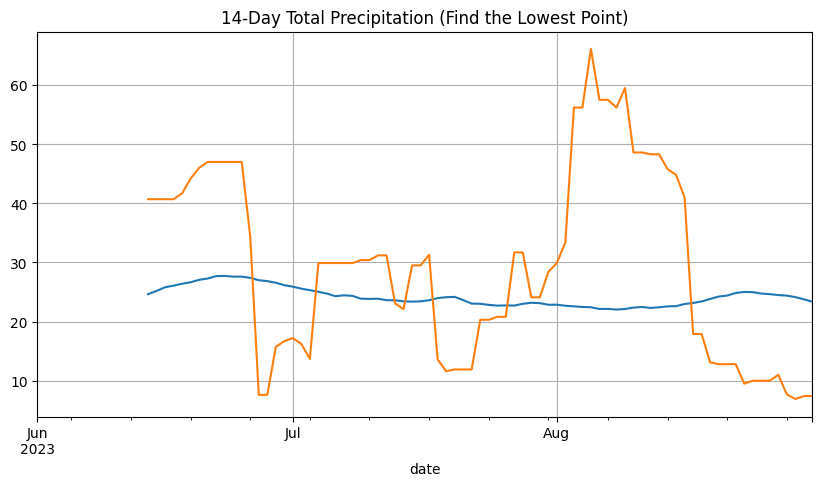

In [4]:
# --- 4. Analysis: Find Best Two Weeks ---

# Define our 14-day ("two week") window
window_size = 14

# --- Calculate Rolling Statistics ---
# using the ORIGINAL, clean names: 'tmax' and 'prcp'
summer_df['14_Day_Avg_Max_Temp'] = summer_df['tmax'].rolling(window=window_size).mean()
summer_df['14_Day_Total_Precip'] = summer_df['prcp'].rolling(window=window_size).sum()

# --- Plot the Results ---

print("--- Analysis Plots ---")

# Plot 1: Average Max Temperature
# We're looking for the PEAK (highest point) on this graph
summer_df['14_Day_Avg_Max_Temp'].plot(grid=True, figsize=(10,5), 
                                      title='14-Day Average Max Temperature (Find the Peak)')

# Plot 2: Total Precipitation
# We're looking for the VALLEY (lowest point) on this graph
summer_df['14_Day_Total_Precip'].plot(grid=True, figsize=(10,5), 
                                     title='14-Day Total Precipitation (Find the Lowest Point)')

---

In [5]:
# --- 5. Find the Best Day from Our Analysis ---

best_end_date = summer_df['14_Day_Avg_Max_Temp'].idxmax()

# Calculate the start date
best_start_date = best_end_date - pd.Timedelta(days=(window_size - 1))

# Get the stats for that best period
best_period_stats = summer_df.loc[best_end_date]


# --- Display The Final Result ---
print("--- 🏆 Holiday Recommendation ---")
print("\nBased on the 2023 data analysis, the best two-week holiday period is:")
print(f"  Start Date: {best_start_date.strftime('%B %d, %Y')}")
print(f"  End Date:   {best_end_date.strftime('%B %d, %Y')}")

print("\nWeather stats for this winning period:")
print(f"  Average Max Temp: {best_period_stats['14_Day_Avg_Max_Temp']:.1f}°C")
print(f"  Total Precipitation: {best_period_stats['14_Day_Total_Precip']:.1f} mm")

--- 🏆 Holiday Recommendation ---

Based on the 2023 data analysis, the best two-week holiday period is:
  Start Date: June 10, 2023
  End Date:   June 23, 2023

Weather stats for this winning period:
  Average Max Temp: 27.7°C
  Total Precipitation: 47.0 mm


# Publication Link

https://nerdyalgorithm.hashnode.dev/week-7-at-dataraflow-the-project-behind-the-project